# Introduction to Dataset Headers

**RowNumber:** Unique identifier for each row.

**CustomerId**: Unique identifier for each customer.

**Surname:** Last name of the customer.

**CreditScore:** Numerical credit score of the customer.

**Geography**: Categorical variable indicating customer's location.

**Gender**: Categorical variable indicating customer's gender.

**Age:** Numerical variable representing the customer's age.

**Tenure:** Numerical variable representing the number of years the customer has been with the bank.

**Balance**: Numerical variable indicating the customer's account balance.

**NumOfProducts:** Numerical variable indicating the number of bank products held by the customer.

**HasCrCard:** Binary variable indicating whether the customer has a credit card (1) or not (0).

**IsActiveMember**: Binary variable indicating whether the customer is an active member (1) or not (0).

**EstimatedSalary**: Numerical variable indicating the estimated salary of the customer.

**Exited:** Binary target variable indicating whether the customer exited (1) or not (0).

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier  
from sklearn.compose import ColumnTransformer

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
original_data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

# 1 Data Exloration

***1.1 Train Data***

In [3]:
train_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [4]:
print(train_data.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


No null value in train data

In [5]:
def get_feature_types(data):
    return {col: "numerical" if pd.api.types.is_numeric_dtype(data[col]) else "categorical" for col in data}



print("\n".join(f"{col}: {feat_type}" for col, feat_type in get_feature_types(train_data).items()))

id: numerical
CustomerId: numerical
Surname: categorical
CreditScore: numerical
Geography: categorical
Gender: categorical
Age: numerical
Tenure: numerical
Balance: numerical
NumOfProducts: numerical
HasCrCard: numerical
IsActiveMember: numerical
EstimatedSalary: numerical
Exited: numerical


Three Features are Categorical

* Gender
* Surname
* Age

In [6]:
 train_data.describe().T.style.background_gradient(cmap='viridis', axis=0)


,count,mean,std,min,25%,50%,75%,max
id,165034.000000,82516.500000,47641.356500,0.000000,41258.250000,82516.500000,123774.750000,165033.000000
CustomerId,165034.000000,15692005.019026,71397.816791,15565701.000000,15633141.000000,15690169.000000,15756824.000000,15815690.000000
CreditScore,165034.000000,656.454373,80.103340,350.000000,597.000000,659.000000,710.000000,850.000000
Age,165034.000000,38.125888,8.867205,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,165034.000000,5.020353,2.806159,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,165034.000000,55478.086689,62817.663278,0.000000,0.000000,0.000000,119939.517500,250898.090000
NumOfProducts,165034.000000,1.554455,0.547154,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,165034.000000,0.753954,0.430707,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.000000,0.497770,0.499997,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,165034.000000,112574.822734,50292.865585,11.580000,74637.570000,117948.000000,155152.467500,199992.480000


***1.2 Test Data***

In [7]:
test_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
8,165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10
9,165043,15752344,Teng,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44


In [8]:
print(test_data.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [9]:
test_data.describe().T.style.background_gradient(cmap='viridis', axis=0)

,count,mean,std,min,25%,50%,75%,max
id,110023.000000,220045.000000,31761.048671,165034.000000,192539.500000,220045.000000,247550.500000,275056.000000
CustomerId,110023.000000,15692096.605101,71684.990992,15565701.000000,15632859.000000,15690175.000000,15756926.000000,15815690.000000
CreditScore,110023.000000,656.530789,80.315415,350.000000,597.000000,660.000000,710.000000,850.000000
Age,110023.000000,38.122205,8.861550,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,110023.000000,4.996637,2.806148,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,110023.000000,55333.611354,62788.519675,0.000000,0.000000,0.000000,120145.605000,250898.090000
NumOfProducts,110023.000000,1.553321,0.544714,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,110023.000000,0.753043,0.431244,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,110023.000000,0.495233,0.499980,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,110023.000000,112315.147765,50277.048244,11.580000,74440.325000,117832.230000,154631.350000,199992.480000


***1.3 Original Data***

In [10]:
original_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [11]:
print(original_data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


original data has some null values

In [12]:
original_data.describe().T.style.background_gradient(cmap='viridis', axis=0)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10002.000000,5001.499600,2887.472338,1.000000,2501.250000,5001.500000,7501.750000,10000.000000
CustomerId,10002.000000,15690933.450110,71931.769345,15565701.000000,15628524.750000,15690732.000000,15753225.500000,15815690.000000
CreditScore,10002.000000,650.555089,96.661615,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10001.000000,38.922311,10.487200,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10002.000000,5.012498,2.891973,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10002.000000,76491.112875,62393.474144,0.000000,0.000000,97198.540000,127647.840000,250898.090000
NumOfProducts,10002.000000,1.530194,0.581639,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10001.000000,0.705529,0.455827,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10001.000000,0.514949,0.499801,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10002.000000,100083.331145,57508.117802,11.580000,50983.750000,100185.240000,149383.652500,199992.480000


# 2  Data Visualization

***2.1 Plot distribution of 'Exited' variable***

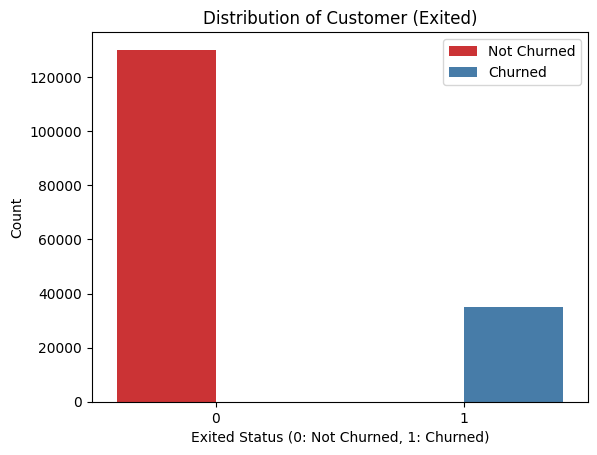

In [13]:
sns.countplot(x='Exited', data=train_data, hue='Exited', palette='Set1')
plt.title('Distribution of Customer (Exited)')
plt.xlabel('Exited Status (0: Not Churned, 1: Churned)')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'], loc='upper right')
plt.show()


Churn refers to customers who discontinue using a service, while not churned refers to customers who continue using the service.

***2.2 Plot count distribution for categorical variables(Gender and Geography)***

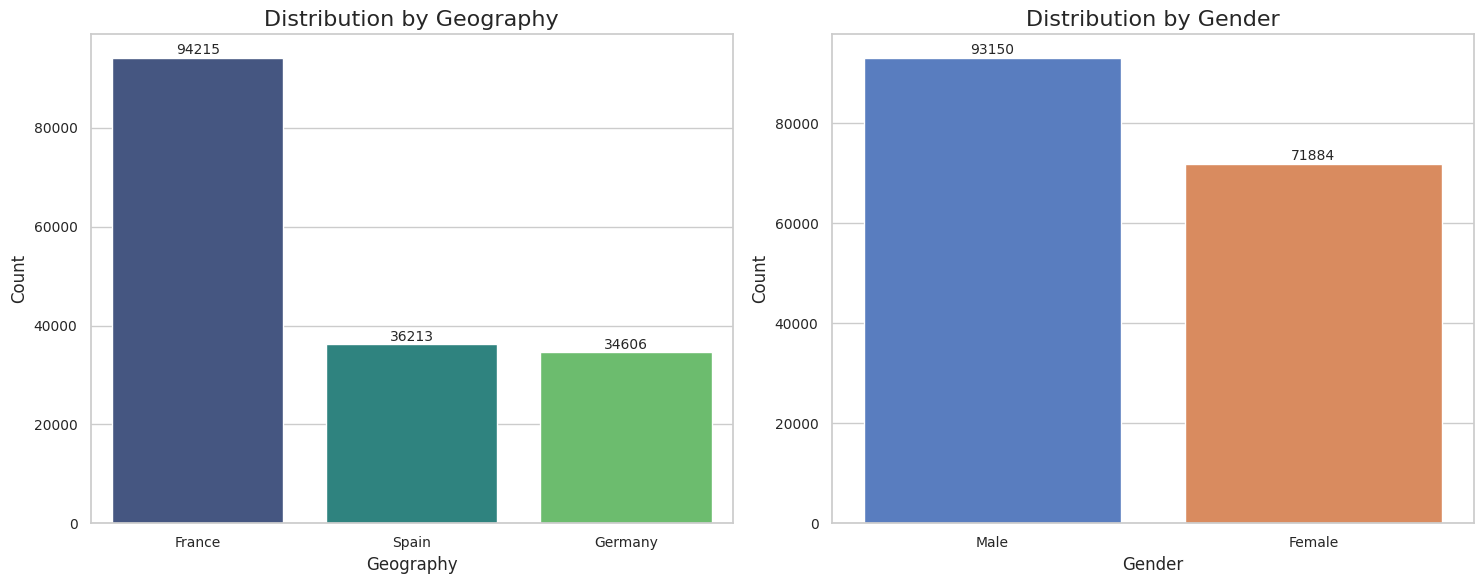

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.countplot(x='Geography', data=train_data, palette='viridis')
plt.title('Distribution by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


geo_counts = train_data['Geography'].value_counts()
for i, count in enumerate(geo_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=10)


plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=train_data, palette='muted')
plt.title('Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

gender_counts = train_data['Gender'].value_counts()
for i, count in enumerate(gender_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


***2.3 Pie chart for Geography and Gender Distribution***

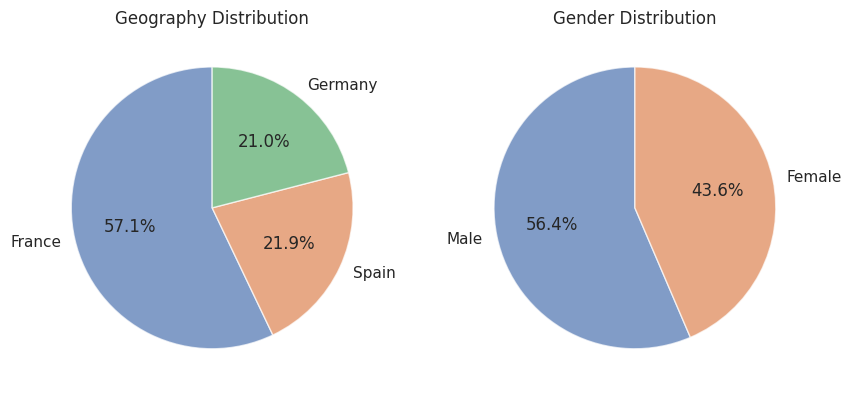

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
patches, texts, autotexts = plt.pie(geo_counts, labels=geo_counts.index, autopct='%1.1f%%', startangle=90)
for patch in patches:
    patch.set_alpha(0.7) 
plt.title('Geography Distribution')

plt.subplot(1, 2, 2)
patches, texts, autotexts = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
for patch in patches:
    patch.set_alpha(0.7)  
plt.title('Gender Distribution')

plt.show()


***2.4 Distribution of Customers by Geography and Gender***

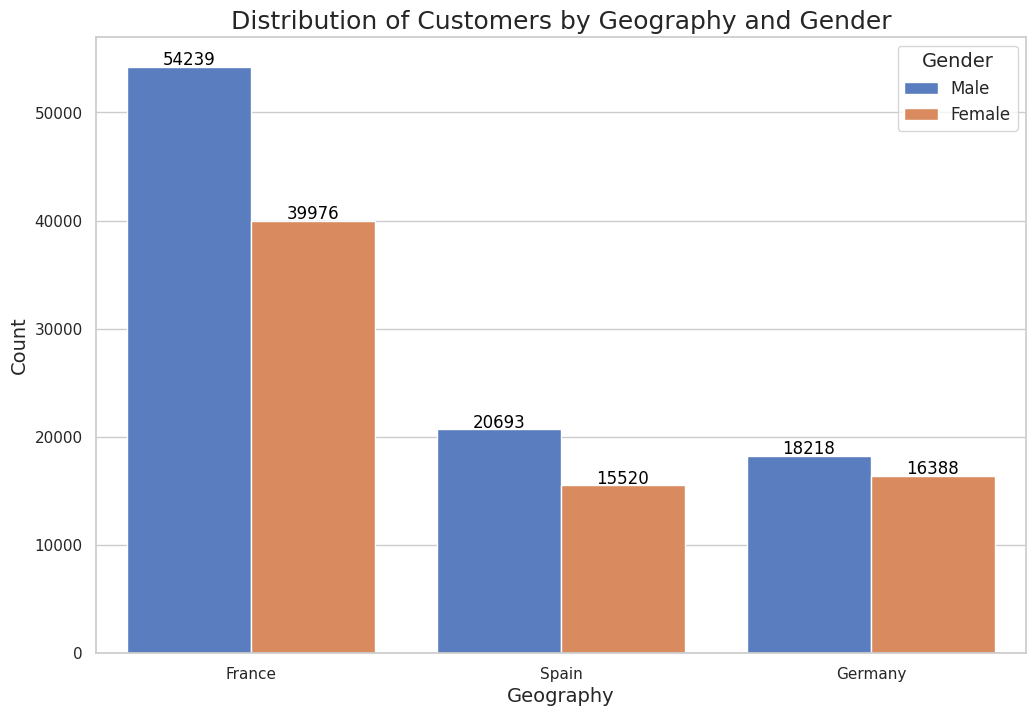

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))


custom_palette = sns.color_palette('muted').as_hex()


sns.countplot(x='Geography', hue='Gender', data=train_data, palette=custom_palette)


plt.title('Distribution of Customers by Geography and Gender', fontsize=18)
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Count', fontsize=14)


for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.legend(title='Gender', title_fontsize='14', fontsize='12', loc='upper right')

plt.show()

***2.5 Plot box plots for numerical features grouped by 'Exited' status***

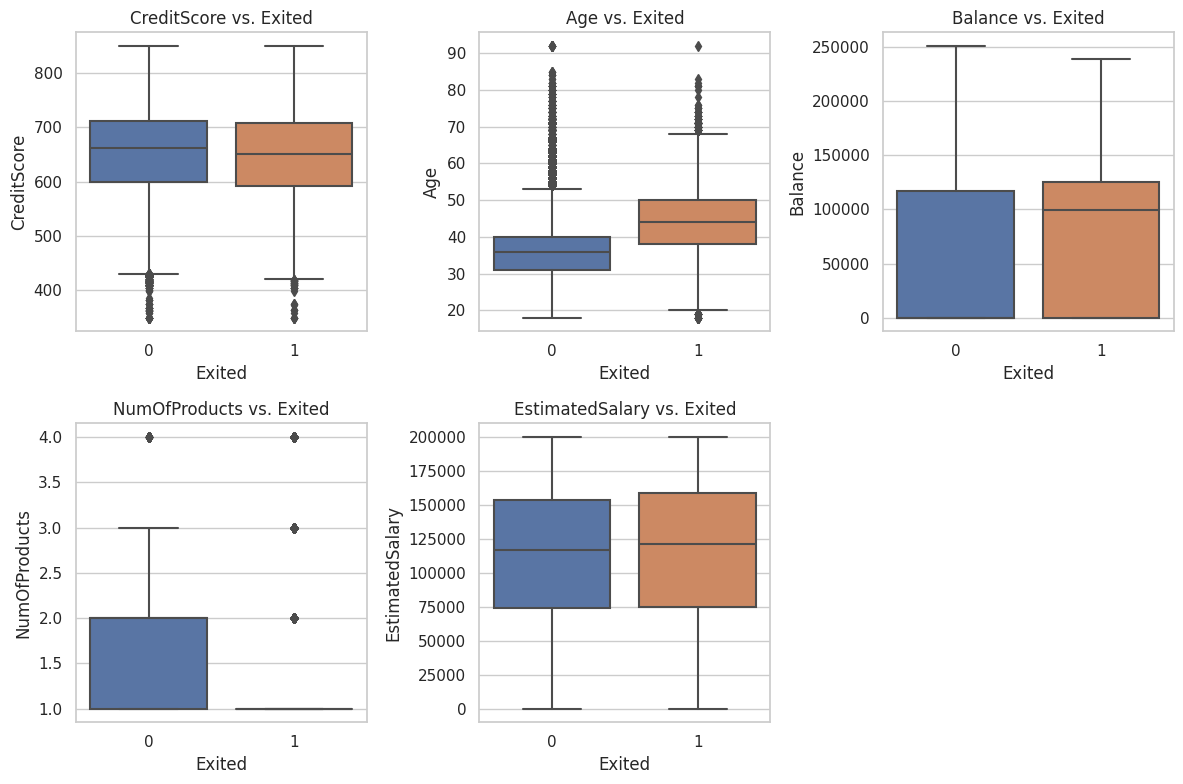

In [17]:
plt.figure(figsize=(12, 8))
num_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Exited', y=feature, data=train_data)
    plt.title(f'{feature} vs. Exited')

plt.tight_layout()
plt.show()


# 3  Data Preprocessing

In [18]:

def preprocess_data(df):
    df['Age'] = df['Age'].astype(int)
    df['NumOfProducts'] = df['NumOfProducts'].astype(int)
    df['HasCrCard'] = df['HasCrCard'].astype(int)
    df['IsActiveMember'] = df['IsActiveMember'].astype(int)
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
    df = pd.concat([df.drop(columns=['Geography'], axis=1), pd.get_dummies(df['Geography'], drop_first=True, dtype=int)], axis=1)
    return df

X_train = preprocess_data(train_data.drop(columns=['id', 'CustomerId', 'Surname', 'Exited'], axis=1))
Y_train = train_data['Exited']
X_test = preprocess_data(test_data.drop(columns=['id', 'CustomerId', 'Surname'], axis=1))

***Cross-Validation***

In [19]:
skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)

# 4 Model Building 

In [20]:
models = {
    'GB': GradientBoostingClassifier(n_estimators=98, max_depth=6, min_samples_split=29, 
                                     min_samples_leaf=5, max_features=10, subsample=0.6747060291909489, random_state=1),
    'HG': HistGradientBoostingClassifier(l2_regularization=3.592621845843185, early_stopping=False,
                                         learning_rate=0.05161573294192279, max_iter=441, max_depth=9, max_bins=255,
                                         min_samples_leaf=17, max_leaf_nodes=19, random_state=10),
    'LGBM': LGBMClassifier(n_estimators=944, learning_rate=0.023710760431498095, max_depth=20, 
                           reg_alpha=1.6333094681195481, reg_lambda=6.302381882653114, num_leaves=46, 
                           subsample=0.3778057790467601, colsample_bytree=0.4822343703997122),
    'MLP': Pipeline([('transformation', ColumnTransformer([('stand', PowerTransformer(), 
                                                             ['Age', 'Tenure', 'EstimatedSalary', 'Balance', 'CreditScore'])],
                                                           remainder='passthrough')),
                     ('MLP', MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', random_state=10))]),
    'XGB': XGBClassifier(max_depth=11, learning_rate=0.023619617114657637, n_estimators=452, gamma=4.471717179966761,
                          min_child_weight=2, colsample_bytree=0.683425957554843, subsample=0.6331796732702679)
}

***Cross-Validation Scores***

In [21]:
cv_scores = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
    cv_scores[name] = cv_score.mean()
    print(f"The average 10-folds oof ROC-AUC score of {name} is {cv_score.mean()}")

The average 10-folds oof ROC-AUC score of GB is 0.8895078690216257
The average 10-folds oof ROC-AUC score of HG is 0.8898921129966016
The average 10-folds oof ROC-AUC score of LGBM is 0.890245999060139
The average 10-folds oof ROC-AUC score of MLP is 0.8873377177445807
The average 10-folds oof ROC-AUC score of XGB is 0.8897430113763141


***Ensemble Models***

In [22]:

voting_model = VotingClassifier(estimators=[('GB', models['GB']), ('HG', models['HG']),
                                            ('LGBM', models['LGBM']), ('MLP', models['MLP']),
                                            ('XGB', models['XGB'])],
                                voting='soft', weights=[1/5, 1/5, 1/5, 1/5, 1/5])

stacking_model_1 = StackingClassifier(estimators=[('GB', models['GB']), ('HG', models['HG']),
                                                  ('LGBM', models['LGBM']), ('MLP', models['MLP']),
                                                  ('XGB', models['XGB'])],
                                      final_estimator=LogisticRegression(C=0.1),
                                      stack_method='predict_proba', n_jobs=-1)

stacking_model_2 = StackingClassifier(estimators=[('GB', models['GB']), ('HG', models['HG']),
                                                  ('LGBM', models['LGBM']), ('MLP', models['MLP']),
                                                  ('XGB', models['XGB'])],
                                      final_estimator=LogisticRegression(C=0.1, penalty='l1', solver='saga', random_state=10),
                                      stack_method='predict_proba', n_jobs=-1)

***Fit Ensemble Models***

In [23]:

voting_model.fit(X_train, Y_train)
stacking_model_1.fit(X_train, Y_train)
stacking_model_2.fit(X_train, Y_train)

StackingClassifier(estimators=[('GB',
                                GradientBoostingClassifier(max_depth=6,
                                                           max_features=10,
                                                           min_samples_leaf=5,
                                                           min_samples_split=29,
                                                           n_estimators=98,
                                                           random_state=1,
                                                           subsample=0.6747060291909489)),
                               ('HG',
                                HistGradientBoostingClassifier(early_stopping=False,
                                                               l2_regularization=3.592621845843185,
                                                               learning_rate=0.05161573294192279,
                                                               max_depth=9,
                                                               max_iter=441,
                                                               max...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=11,
                                              max_leaves=None,
                                              min_child_weight=2, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=452, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(C=0.1, penalty='l1',
                                                      random_state=10,
                                                      solver='saga'),
                   n_jobs=-1, stack_method='predict_proba')

# 5 Predictions and Submission

In [24]:
sample_submission['Exited'] = (voting_model.predict_proba(X_test)[:, 1] + 
                        stacking_model_1.predict_proba(X_test)[:, 1] +
                        stacking_model_2.predict_proba(X_test)[:, 1]) / 3


sample_submission.to_csv('modified_baseline_submission.csv', index=False)